In [1]:
!pip install torch torchvision transformers scikit-learn pillow
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-g3eq21ss
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-g3eq21ss
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.4 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=c6cbc03d14e417452d51dcb091df585635a01205ad12c90d826d37e7d948936a
  Stored in directory: /tmp/pip-ephem-wheel-cache-p9602ctu/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [2]:
import clip
from PIL import Image
import torch

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Function to extract CLIP embeddings
def extract_clip_embeddings(image_paths):
    embeddings = []
    for path in image_paths:
        image = preprocess(Image.open(path)).unsqueeze(0).to(device)
        with torch.no_grad():
            features = model.encode_image(image)
        embeddings.append(features.cpu().numpy().squeeze())  # Store as numpy arrays
    return embeddings

100%|███████████████████████████████████████| 338M/338M [00:07<00:00, 48.8MiB/s]


In [3]:
import os

# Folder containing images
image_folder = "/content/drive/MyDrive/ATML/blonde"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('jpg', 'png'))]

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Extract embeddings
embeddings = extract_clip_embeddings(image_paths)
embeddings = np.array(embeddings)  # Convert to numpy array

# Define number of clusters (e.g., 20 for base model training as in the paper)
num_clusters = 400
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)

# Get cluster centers and assignments
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [5]:
from scipy.spatial.distance import cdist

# Compute distances of each embedding to cluster centers
distances = cdist(embeddings, cluster_centers)

# Select one image closest to each cluster center
representative_indices = np.argmin(distances, axis=0)
representative_images = [image_paths[i] for i in representative_indices]

print("Representative images:", representative_images)

Representative images: ['/content/drive/MyDrive/ATML/blonde/753.png', '/content/drive/MyDrive/ATML/blonde/224.png', '/content/drive/MyDrive/ATML/blonde/105 (1).png', '/content/drive/MyDrive/ATML/blonde/96.png', '/content/drive/MyDrive/ATML/blonde/952.png', '/content/drive/MyDrive/ATML/blonde/815.png', '/content/drive/MyDrive/ATML/blonde/836.png', '/content/drive/MyDrive/ATML/blonde/429.png', '/content/drive/MyDrive/ATML/blonde/893.png', '/content/drive/MyDrive/ATML/blonde/876.png', '/content/drive/MyDrive/ATML/blonde/596.png', '/content/drive/MyDrive/ATML/blonde/49.png', '/content/drive/MyDrive/ATML/blonde/668.png', '/content/drive/MyDrive/ATML/blonde/534.png', '/content/drive/MyDrive/ATML/blonde/227.png', '/content/drive/MyDrive/ATML/blonde/371.png', '/content/drive/MyDrive/ATML/blonde/276.png', '/content/drive/MyDrive/ATML/blonde/500.png', '/content/drive/MyDrive/ATML/blonde/154.png', '/content/drive/MyDrive/ATML/blonde/943.png']


In [6]:
import shutil

# Folder to save representative images
output_folder = "/content/drive/MyDrive/ATML/Representative_blonde"
os.makedirs(output_folder, exist_ok=True)

for img_path in representative_images:
    shutil.copy(img_path, output_folder)

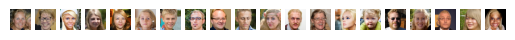

In [7]:
import matplotlib.pyplot as plt

for idx, img_path in enumerate(representative_images):
    img = Image.open(img_path)
    plt.subplot(1, num_clusters, idx + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()